In [1]:
#include "ROOT/RDataFrame.hxx"
#include "ROOT/RVec.hxx"
#include <ROOT/RLogger.hxx>
#include "TCanvas.h"
#include "TFile.h"
#include "TH1D.h"
#include "TF1.h"
#include "TMath.h"
#include "THStack.h"
#include "TLegend.h"
#include "Math/Vector4D.h"

//cpp
#include <vector>
#include <iostream>
#include <fstream>
#include <iomanip>
#include <cstdlib>
#include <cstdio>
#include <string>
#include <Math/GenVector/LorentzVector.h>
#include <Math/GenVector/PtEtaPhiM4D.h>
#include <stdlib.h>
#include <math.h>
#include <TH1.h>

template <typename T> using Vec = ROOT::RVec<T>; 
ROOT::RDataFrame df_w3pi("Events","/home/pietro/Documents/W3Pi/l1Nano_WTo3Pion_PU200_iso.root");
ROOT::RDataFrame df_neutrino("Events","/home/pietro/Documents/W3Pi/l1Nano_SingleNeutrino_big_PU200.125X_v0.0.root");

# W3Pi file
## particle per events distribution

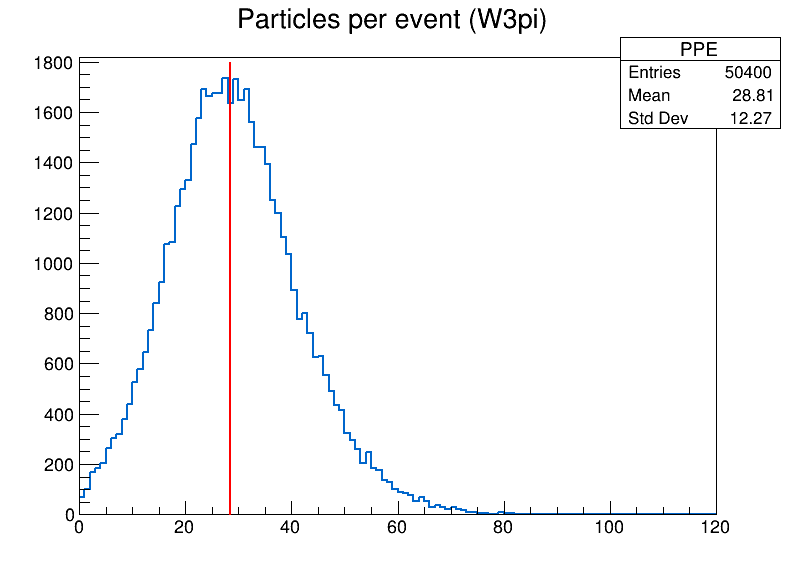

median: 28.5
mean: 28.8146


In [2]:
auto c1 = new TCanvas ("c1", "c1", 800,600);
auto hist_w3pi = df_w3pi.Histo1D({"PPE", "Particles per event (W3pi)", 120, 0, 120}, "nL1Puppi").GetValue();

hist_w3pi.SetLineColor(kAzure+2);
hist_w3pi.SetLineWidth(2);

///////// Calculate the median and the mean and then plot them /////////
int n = hist_w3pi.GetXaxis()->GetNbins();  
std::vector<double>  x(n);
hist_w3pi.GetXaxis()->GetCenter( &x[0] );
const double * y = hist_w3pi.GetArray(); 
float median = TMath::Median(n, &x[0], &y[1]); 

Double_t mean  = hist_w3pi.GetMean();
std::cout << "median: " << median << std::endl;
std::cout << "mean: " << mean << std::endl;

TLine* median_line = new TLine(median, 0, median, 1800);
median_line->SetLineColor(kRed);
median_line->SetLineWidth(2);
hist_w3pi.Draw();
median_line->Draw("same");
c1 -> Draw();

## Log(N)

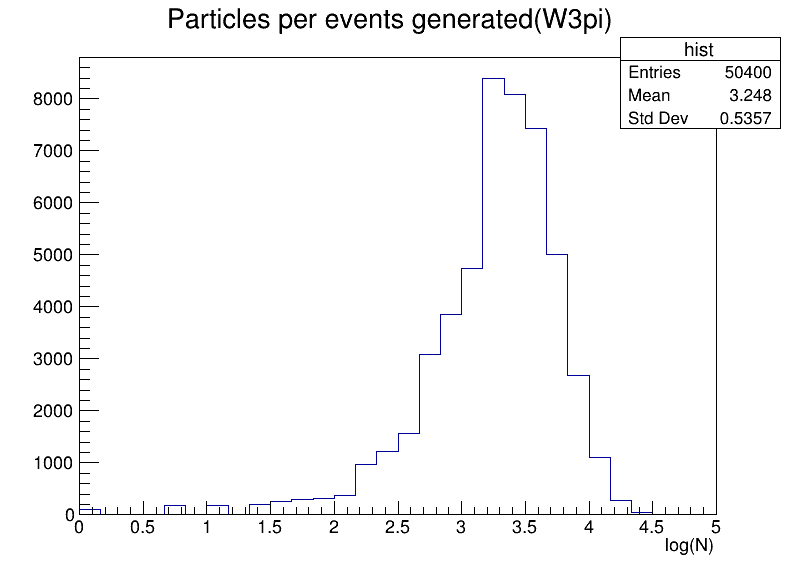

In [3]:
auto Npuppi   = df_w3pi.Take<ROOT::VecOps::RVec<UInt_t>>("nL1Puppi").GetValue();
auto c2 = new TCanvas("c2", "c2", 800,600);

///////////// SIMULATED /////////////
TH1F* hist_logn = new TH1F("hist", "Particles per events generated(W3pi); log(N)", 30, 0, 5); //GeV
for (const auto &n : Npuppi){
    hist_logn->Fill(log(n[0]));
}
Double_t k = hist_logn->GetStdDev();
// std::cout << "sigma (or k): " << k << std::endl;
hist_logn->Draw();
c2->Draw();

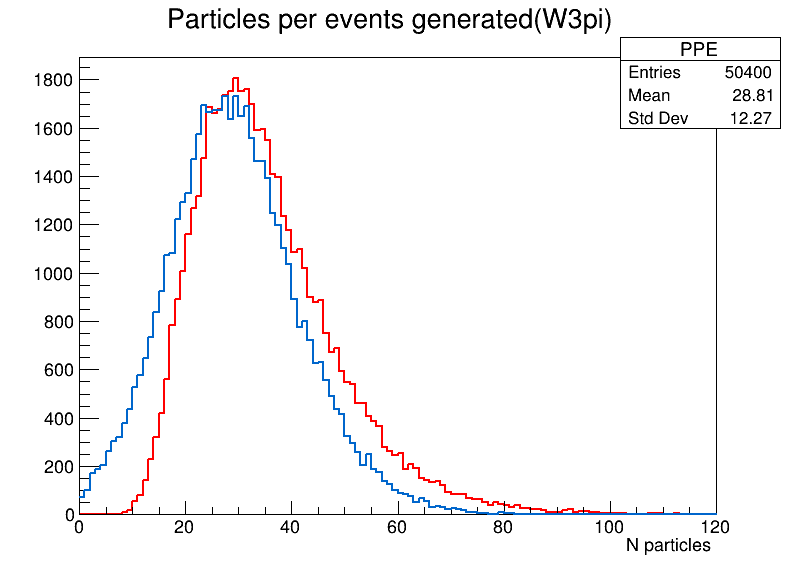

N0 (median) = 53.5, k(sigma) = 1.45
MC (w3pi):	 media = 28.8146, sigma = 12.2669
lognorm:	 media = 34.7978, sigma = 13.4397


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


In [38]:
////////////// SETTING PARAMETERS //////////////////
// Double_t k = hist_logn->GetStdDev();
// float N0 = TMath::Median(n, &x[0], &y[1]); 
Double_t k = 1.45;
float N0 = 33; 

std::random_device rd;
std::mt19937 gen(rd());
std::normal_distribution<float> distribution(0.,1.);

// float N0 = mean;
int events = 1e4;
std::vector<int> N_gen;

for(int i=0; i<50400; i++){
    double theta = distribution(gen);
    int N = N0 * pow(k,theta);
    N_gen.push_back(std::min(N, 208));
}
auto c1 = new TCanvas("c1", "c1", 800,600);

///////////// SIMULATED /////////////
TH1F* hist_n = new TH1F("hist", "Particles per events generated(W3pi); N particles", 120, 0, 120); //GeV
for (const auto &n : N_gen){
    hist_n->Fill(n);
}

hist_n->SetLineColor(kRed);
hist_n->SetLineWidth(2);
hist_n->Draw();
hist_w3pi.Draw("same");
c1->Draw();

std::cout << "N0 (median) = " << median << ", k(sigma) = " << k << std::endl;
std::cout << "MC (w3pi):\t media = " << hist_w3pi.GetMean() << ", sigma = " << hist_w3pi.GetStdDev() << std::endl;
std::cout << "lognorm:\t media = " << hist_n->GetMean() << ", sigma = " << hist_n->GetStdDev() << std::endl;

# Neutrino Gun file
## particle per events distribution

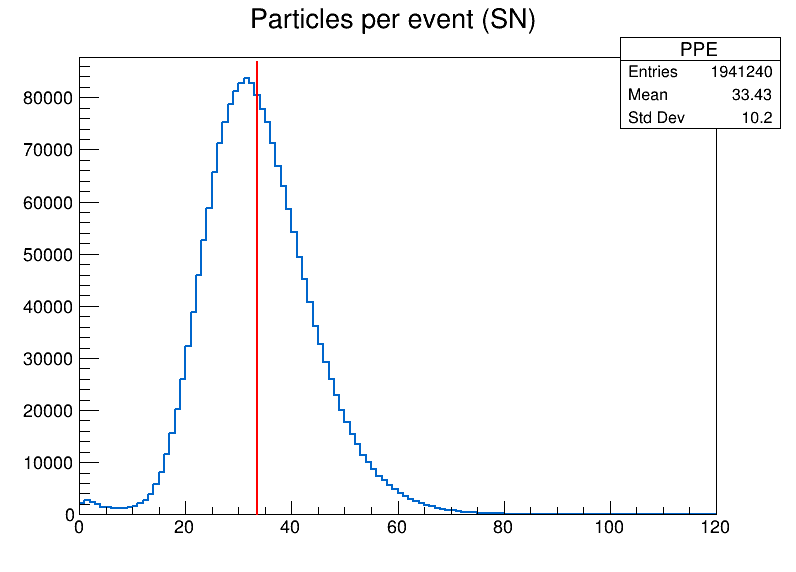

median: 33.5
mean: 33.4325


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TClass::Init>: no dictionary for class edm::Hash<1> is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessHistory is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessConfiguration is available
Warning in <TClass::Init>: no dictionary for class edm::ParameterSetBlob is available
Warning in <TClass::Init>: no dictionary for class pair<edm::Hash<1>,edm::ParameterSetBlob> is available


In [5]:
auto c1 = new TCanvas ("c1", "c1", 800,600);
auto hist_neutrino = df_neutrino.Histo1D({"PPE", "Particles per event (SN)", 120, 0, 120}, "nL1Puppi").GetValue();

hist_neutrino.SetLineColor(kAzure+2);
hist_neutrino.SetLineWidth(2);

///////// Calculate the median and the mean and then plot them /////////
int n = hist_neutrino.GetXaxis()->GetNbins();  
std::vector<double>  x(n);
hist_neutrino.GetXaxis()->GetCenter( &x[0] );
const double * y = hist_neutrino.GetArray(); 
float median = TMath::Median(n, &x[0], &y[1]); 

Double_t mean  = hist_neutrino.GetMean();
std::cout << "median: " << median << std::endl;
std::cout << "mean: " << mean << std::endl;

TLine* median_line = new TLine(median, 0, median, 87000);
median_line->SetLineColor(kRed);
median_line->SetLineWidth(2);
hist_neutrino.Draw();
median_line->Draw("same");
c1 -> Draw();

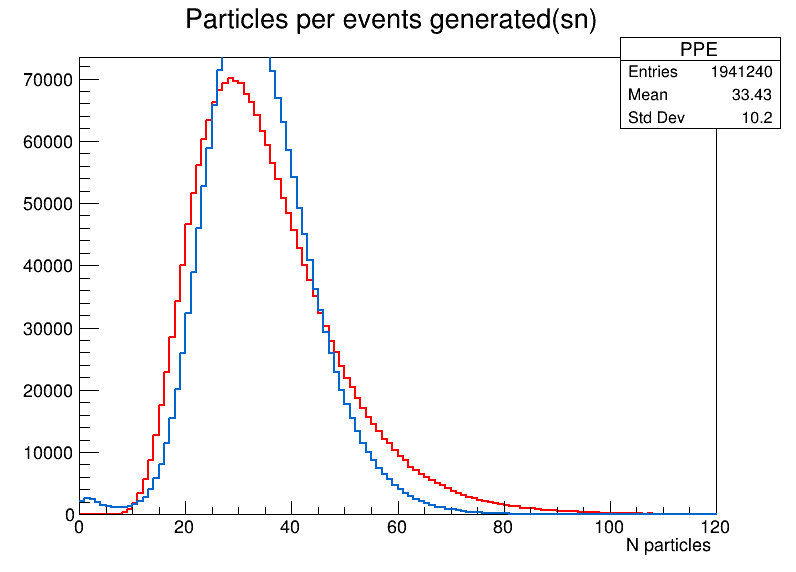

N0 (median) = 53.5, k(sigma) = 1.45
MC (sn):	 media = 33.4325, sigma = 10.1972
lognorm:	 media = 34.8247, sigma = 13.5157


Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


In [39]:
auto Npuppi   = df_neutrino.Take<ROOT::VecOps::RVec<UInt_t>>("nL1Puppi").GetValue();
TH1F* hist_logsn = new TH1F("hist", "Particles per events generated(sn); log(N)", 30, 0, 5); //GeV
for (const auto &n : Npuppi){
    hist_logsn->Fill(log(n[0]));
}

////////////// SETTING PARAMETERS //////////////////
// Double_t k = hist_logsn->GetStdDev();
// float N0 = TMath::Median(n, &x[0], &y[1]); 
Double_t k = 1.45;
float N0 = 33; 

std::random_device rd;
std::mt19937 gen(rd());
std::normal_distribution<float> distribution(0.,1.);

// float N0 = mean;
int events = 1e4;
std::vector<int> N_gen;

for(int i=0; i<2e6; i++){
    double theta = distribution(gen);
    int N = N0 * pow(k,theta);
    N_gen.push_back(std::min(N, 208));
}
auto c1 = new TCanvas("c1", "c1", 800,600);

///////////// SIMULATED /////////////
TH1F* hist_n = new TH1F("hist", "Particles per events generated(sn); N particles", 120, 0, 120); //GeV
for (const auto &n : N_gen){
    hist_n->Fill(n);
}

hist_n->SetLineColor(kRed);
hist_n->SetLineWidth(2);
hist_n->Draw();
hist_neutrino.Draw("same");
c1->Draw();

std::cout << "N0 (median) = " << median << ", k(sigma) = " << k << std::endl;
std::cout << "MC (sn):\t media = " << hist_neutrino.GetMean() << ", sigma = " << hist_neutrino.GetStdDev() << std::endl;
std::cout << "lognorm:\t media = " << hist_n->GetMean() << ", sigma = " << hist_n->GetStdDev() << std::endl;

# ttbar

In [7]:
ROOT::RDataFrame df_ttbar("Events","/home/pietro/Documents/W3Pi/l1Nano_TTbar_PU200_iso.root");

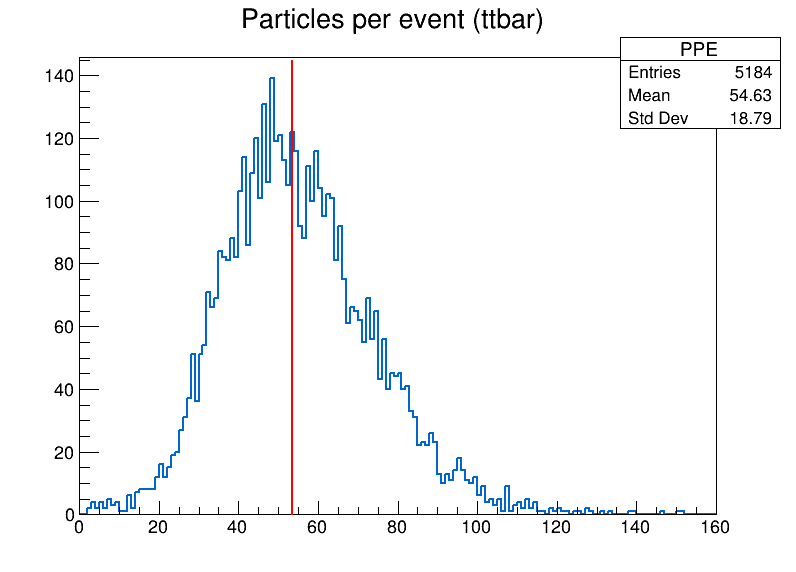

median: 53.5
mean: 54.6262


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [8]:
auto c1 = new TCanvas ("c1", "c1", 800,600);
auto hist_ttbar = df_ttbar.Histo1D({"PPE", "Particles per event (ttbar)", 160, 0, 160}, "nL1Puppi").GetValue();

hist_ttbar.SetLineColor(kAzure+2);
hist_ttbar.SetLineWidth(2);

///////// Calculate the median and the mean and then plot them /////////
int n = hist_ttbar.GetXaxis()->GetNbins();  
std::vector<double>  x(n);
hist_ttbar.GetXaxis()->GetCenter( &x[0] );
const double * y = hist_ttbar.GetArray(); 
float median = TMath::Median(n, &x[0], &y[1]); 

Double_t mean  = hist_ttbar.GetMean();
std::cout << "median: " << median << std::endl;
std::cout << "mean: " << mean << std::endl;

TLine* median_line = new TLine(median, 0, median, 145);
median_line->SetLineColor(kRed);
median_line->SetLineWidth(2);
hist_ttbar.Draw();
median_line->Draw("same");
c1 -> Draw();

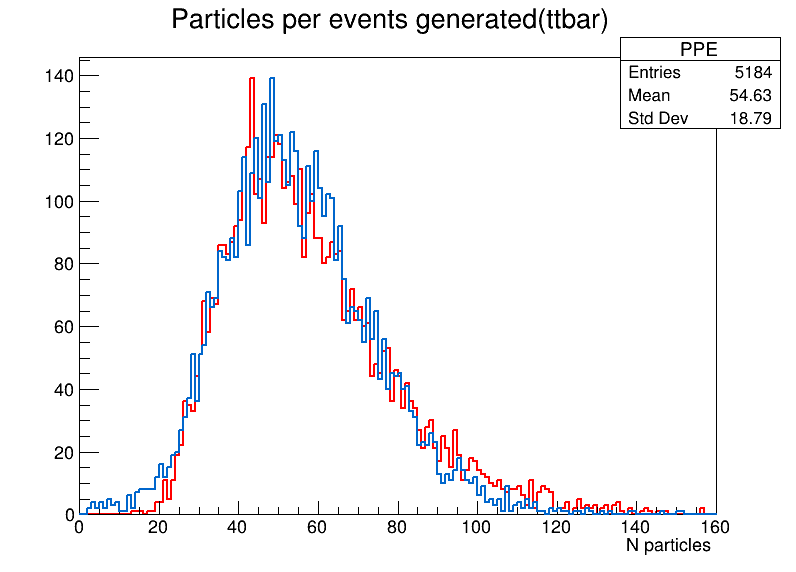

N0 (median) = 53.5, k(sigma) = 1.42
MC (ttbar):	 media = 54.6262, sigma = 18.7904
lognorm:	 media = 57.2723, sigma = 20.7074


Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


In [9]:
auto Npuppi   = df_ttbar.Take<ROOT::VecOps::RVec<UInt_t>>("nL1Puppi").GetValue();
TH1F* hist_logn_tt = new TH1F("hist", "Particles per events generated(ttbar); log(N)", 30, 0, 5); //GeV
for (const auto &n : Npuppi){
    hist_logn_tt->Fill(log(n[0]));
}

////////////// SETTING PARAMETERS //////////////////
// Double_t k = hist_logn_tt->GetStdDev();
// float N0 = TMath::Median(n, &x[0], &y[1]);
Double_t k = 1.42;
float N0 = 54.5; 

std::random_device rd;
std::mt19937 gen(rd());
std::normal_distribution<float> distribution(0.,1.);

// float N0 = mean;
int events = 5.1e3;
std::vector<int> N_gen;

for(int i=0; i<events; i++){
    double theta = distribution(gen);
    int N = N0 * pow(k,theta);
    N_gen.push_back(std::min(N, 208));
}
auto c1 = new TCanvas("c1", "c1", 800,600);

///////////// SIMULATED /////////////
TH1F* hist_n = new TH1F("hist", "Particles per events generated(ttbar); N particles", 160, 0, 160); //GeV
for (const auto &n : N_gen){
    hist_n->Fill(n);
}

hist_n->SetLineColor(kRed);
hist_n->SetLineWidth(2);
hist_n->Draw();
hist_ttbar.Draw("same");
c1->Draw();

std::cout << "N0 (median) = " << median << ", k(sigma) = " << k << std::endl;
std::cout << "MC (ttbar):\t media = " << hist_ttbar.GetMean() << ", sigma = " << hist_ttbar.GetStdDev() << std::endl;
std::cout << "lognorm:\t media = " << hist_n->GetMean() << ", sigma = " << hist_n->GetStdDev() << std::endl;

In [10]:
Npuppi

(std::vector<ROOT::VecOps::RVec<unsigned int>, std::allocator<ROOT::VecOps::RVec<unsigned int> > > &) { { 46 }, { 48 }, { 41 }, { 43 }, { 91 }, { 59 }, { 39 }, { 54 }, { 27 }, { 27 }, { 41 }, { 71 }, { 20 }, { 37 }, { 39 }, { 49 }, { 75 }, { 39 }, { 59 }, { 73 }, { 72 }, { 38 }, { 60 }, { 53 }, { 37 }, { 66 }, { 73 }, { 44 }, { 48 }, { 60 }, { 73 }, { 68 }, { 69 }, { 32 }, { 50 }, { 49 }, { 28 }, { 121 }, { 80 }, { 34 }, { 101 }, { 34 }, { 40 }, { 53 }, { 35 }, { 35 }, { 62 }, { 57 }, { 92 }, { 26 }, { 34 }, { 37 }, { 53 }, { 44 }, { 70 }, { 113 }, { 47 }, { 75 }, { 78 }, { 61 }, { 59 }, { 57 }, { 63 }, { 31 }, { 56 }, { 41 }, { 34 }, { 89 }, { 47 }, { 59 }, { 19 }, { 34 }, { 57 }, { 63 }, { 28 }, { 70 }, { 47 }, { 45 }, { 69 }, { 46 }, { 60 }, { 60 }, { 89 }, { 67 }, { 31 }, { 77 }, { 39 }, { 32 }, { 48 }, { 64 }, { 61 }, { 72 }, { 46 }, { 51 }, { 50 }, { 48 }, { 74 }, { 51 }, { 58 }, { 32 }, { 25 }, { 38 }, { 39 }, { 48 }, { 49 }, { 42 }, { 51 }, { 46 }, { 76 }, { 56 }, { 63 }, { 47 

# Function

In [11]:
void grid_search(std::vector<ROOT::VecOps::RVec<unsigned int>> Npuppi, float k, float N0, int events){

    TH1F* hist_nn = new TH1F("hist", "Particles per events generated; (N)", 150, 0, 150);
    TH1F* hist_logn = new TH1F("hist", "Particles per events generated; log(N)", 30, 0, 5);
    for (const auto &n : Npuppi){
        hist_nn->Fill(n[0]);
        hist_logn_tt->Fill(log(n[0]));
    }

    ////////////// SETTING PARAMETERS //////////////////
    // std::vector<double> k_vec = {k-2, k-1, k, k+1, k+2};
    // std::vector<float> N0_vec = {N0-10, N0-5, N0, N0+5, N0+10};
    std::random_device rd;
    std::mt19937 gen(rd());
    std::normal_distribution<float> distribution(0.,1.);
    // int events = 2.5e3;
    std::vector<int> N_gen;

    for(int i=0; i<events; i++){
        double theta = distribution(gen);
        int N = N0 * pow(k,theta);
        N_gen.push_back(std::min(N, 208));
    }
    ///////////// SIMULATED /////////////
    TH1F* hist_gen = new TH1F("hist", "Particles per events generated(ttbar); N particl   es", 150, 0, 150); //GeV
    for (const auto &n : N_gen){
        hist_gen->Fill(n);
    }

    // std::cout << "N0 (median) = " << N0 << ", k(sigma) = " << k << std::endl;
    std::cout << "MC (ttbar):\t media = " << hist_nn->GetMean() << ", sigma = " << hist_nn->GetStdDev() << std::endl;
    std::cout << "lognorm:\t media = " << hist_gen->GetMean() << ", sigma = " << hist_gen->GetStdDev() << std::endl;   
}

In [12]:
auto Npuppi_w3pi  = df_w3pi.Take<ROOT::VecOps::RVec<UInt_t>>("nL1Puppi").GetValue();
auto Npuppi_neutrino = df_neutrino.Take<ROOT::VecOps::RVec<UInt_t>>("nL1Puppi").GetValue();
auto Npuppi_ttbar = df_ttbar.Take<ROOT::VecOps::RVec<UInt_t>>("nL1Puppi").GetValue();

float k = 1.42;
float N0_w3pi     = 28.5;
float N0_neutrino = 32;
float N0_ttbar    = 54.5;

grid_search(Npuppi_w3pi, k, N0_w3pi, 50400);
grid_search(Npuppi_neutrino, k, N0_neutrino, 2e4);
grid_search(Npuppi_neutrino, k, N0_ttbar, 5100);


MC (ttbar):	 media = 28.8146, sigma = 12.2669
lognorm:	 media = 29.7958, sigma = 10.9354
MC (ttbar):	 media = 33.4325, sigma = 10.1972
lognorm:	 media = 33.5359, sigma = 12.3636
MC (ttbar):	 media = 33.4325, sigma = 10.1972
lognorm:	 media = 57.7876, sigma = 20.7444


Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


## LUT $k^\theta$

In [13]:
// std::vector<float> thetas;
// float k = 1.45;
// std::vector<float> NLUT;

// std::random_device rd;
// std::mt19937 gen(rd());
// std::normal_distribution<float> distribution(0.,1.);
// for(int i=0; i<2047; i++){
//     thetas.push_back(distribution(gen));
// }
// std::sort(thetas.begin(), thetas.end());



// std::vector<float> probs;
// std::vector<float> thetas;
// for(int i=1; i<2048; i++){
//     probs.push_back((float)i/ (float)2048);
//     thetas.push_back(normalCDF((float)i/ (float)2048));
// }


// for(int i=0; i<2047; i++){
//     NLUT.push_back(pow(k,thetas[i]));
// }


In [14]:
// thetas

In [15]:
std::ifstream fin("n_puppi_00.dat");

std::vector<int>npuppi;
int value;

std::string line;
std::getline(fin, line);
std::istringstream npuppi_line(line);
while (npuppi_line >> value) {
    npuppi.push_back(value);
}

In [16]:
npuppi.size()

(unsigned long) 50400


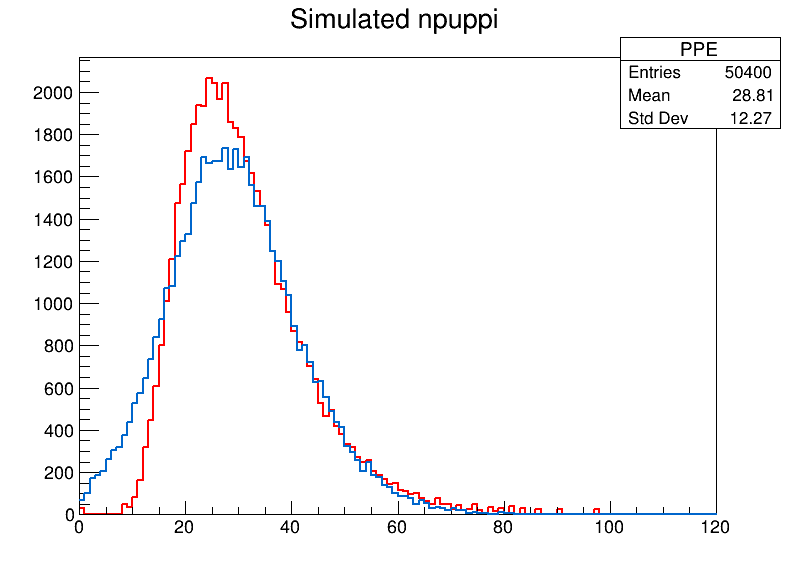

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


In [29]:
auto c1 = new TCanvas("c1", "c1", 800,600);

TH1F* hist_gen = new TH1F("hist", "Simulated npuppi", 120, 0, 120); //GeV
int i=0;
for (const auto &n : npuppi){
    hist_gen->Fill(n);
    i++;
    // if(i==50400) break;
}
hist_gen->SetLineColor(kRed);
hist_gen->SetLineWidth(2);

hist_gen->Draw();
hist_w3pi.Draw("same");
c1->Draw();

### Generate $\theta$


In [18]:
std::ifstream fin("thetas.txt");
float k = 1.45;
std::vector<float> NLUT;
std::vector<float>thetas;
float value;

while(fin >> value){
    thetas.push_back(value);
}

for(int i=0; i<2047; i++){
    NLUT.push_back(pow(k,thetas[i]));
}


In [19]:
NLUT

(std::vector<float> &) { 0.285199f, 0.293738f, 0.316390f, 0.331094f, 0.342275f, 0.351422f, 0.359226f, 0.366074f, 0.372200f, 0.377762f, 0.382868f, 0.387598f, 0.392012f, 0.396156f, 0.400066f, 0.403772f, 0.407298f, 0.410663f, 0.413884f, 0.416976f, 0.419950f, 0.422817f, 0.425585f, 0.428263f, 0.430857f, 0.433375f, 0.435820f, 0.438199f, 0.440514f, 0.442772f, 0.444974f, 0.447124f, 0.449226f, 0.451282f, 0.453293f, 0.455264f, 0.457195f, 0.459089f, 0.460947f, 0.462771f, 0.464563f, 0.466325f, 0.468056f, 0.469759f, 0.471435f, 0.473085f, 0.474710f, 0.476310f, 0.477888f, 0.479443f, 0.480977f, 0.482490f, 0.483983f, 0.485456f, 0.486911f, 0.488348f, 0.489767f, 0.491169f, 0.492555f, 0.493925f, 0.495280f, 0.496619f, 0.497944f, 0.499255f, 0.500553f, 0.501836f, 0.503107f, 0.504365f, 0.505611f, 0.506845f, 0.508067f, 0.509278f, 0.510478f, 0.511667f, 0.512845f, 0.514013f, 0.515171f, 0.516320f, 0.517458f, 0.518588f, 0.519708f, 0.520819f, 0.521921f, 0.523015f, 0.524100f, 0.525178f, 0.526247f, 0.527308f, 0.52836